In [ ]:
import os
import logging
import spacy
import subjectVerbObjectExtractUtil as svoExtract
import experimentUtil as expUtil
import mergeGraphUtil as mergeUtil
logging.basicConfig(format='%(asctime)s %(message)s', level=logging.INFO)
logging.getLogger().setLevel(logging.INFO)

In [ ]:
INTRO_MD_DIR = "introMDFiles"
CLEAN_INTRO_MD_DIR = "cleanedTexts"
SUBJECT_OBJECT_VERB_CSV = "svo.csv"

In [3]:
#Clean and Extract Text from Intro.md Files

for file in os.listdir(INTRO_MD_DIR):
    input_file_string = open(os.path.join(INTRO_MD_DIR, file)).read()
    proccessedText = svoExtract.extract(input_file_string)
    outputFileName, _ = os.path.splitext(file)
    outputFileName = os.path.join(CLEAN_INTRO_MD_DIR, outputFileName)
    outputFileName += ".txt"
    
    with open(outputFileName, 'w') as filetowrite:
        filetowrite.write(proccessedText)
        filetowrite.close()
        
    logging.info(outputFileName + " file created")

2019-03-27 10:50:16,731 cleanedTexts/semiparametric.txt file created
2019-03-27 10:50:16,735 cleanedTexts/khan.txt file created
2019-03-27 10:50:16,739 cleanedTexts/sis_intro.txt file created
2019-03-27 10:50:16,743 cleanedTexts/seird_stochastic.txt file created
2019-03-27 10:50:16,747 cleanedTexts/karlsson.txt file created
2019-03-27 10:50:16,750 cleanedTexts/ross.txt file created
2019-03-27 10:50:16,755 cleanedTexts/coalescent.txt file created
2019-03-27 10:50:16,758 cleanedTexts/mayanderson.txt file created
2019-03-27 10:50:16,763 cleanedTexts/deleo.txt file created
2019-03-27 10:50:16,770 cleanedTexts/sir_model_intro.txt file created
2019-03-27 10:50:16,777 cleanedTexts/lloydjansen.txt file created
2019-03-27 10:50:16,781 cleanedTexts/erlang.txt file created
2019-03-27 10:50:16,787 cleanedTexts/blackross.txt file created
2019-03-27 10:50:16,793 cleanedTexts/1host1vector.txt file created
2019-03-27 10:50:16,798 cleanedTexts/seir_intro.txt file created


In [4]:
#Extract Subject Verb Object
#Creates subject verb object csv file
svoExtract.extractSVO(CLEAN_INTRO_MD_DIR)

2019-03-27 10:50:16,855 writing 4 tuples
2019-03-27 10:50:16,858 Skipping file .DS_Store
2019-03-27 10:50:16,921 writing 1 tuples
2019-03-27 10:50:17,052 writing 20 tuples
2019-03-27 10:50:17,092 writing 2 tuples
2019-03-27 10:50:17,127 writing 0 tuples
2019-03-27 10:50:17,221 writing 3 tuples
2019-03-27 10:50:17,271 writing 12 tuples
2019-03-27 10:50:17,353 writing 2 tuples
2019-03-27 10:50:17,477 writing 23 tuples
2019-03-27 10:50:17,523 writing 7 tuples
2019-03-27 10:50:17,561 writing 1 tuples
2019-03-27 10:50:17,597 writing 7 tuples
2019-03-27 10:50:17,643 writing 5 tuples
2019-03-27 10:50:17,756 writing 22 tuples
2019-03-27 10:50:17,785 writing 3 tuples
2019-03-27 10:50:17,788 File svo.csv created


In [5]:
import umap
umap.UMAP

umap.umap_.UMAP

In [6]:
# Creates CSV of UMAP and DBSCAN Clusters and InSample Vs OutSample Similarities
# Outputs clusteringLabels.csv

#expUtil.createCluster(SUBJECT_OBJECT_VERB_CSV)

In [9]:
# Get Kmeans Experiment Accuracy
# Assigns Cluster Labels to Variable Inputs to KMeansPredicted.csv and computes accuracy by taking the difference
# with the ground truth labels in JuliaDataVariable.csv
expUtil.runKMeansExp()

250
<class 'numpy.ndarray'> <class 'int'> <class 'numpy.ndarray'>


2019-03-25 11:09:17,860 generating CSV ExperimentData/KmeansCluster.csv
2019-03-25 11:09:17,864 generating CSV ExperimentData/KmeansPredicted.csv
2019-03-25 11:09:17,873 KMeans Accuracy is : 0.2222222222222222


In [ ]:
# Uses cluster that is most "similar" to the variable for cluster assignment
expUtil.runUMapSimilarityExp()

<class 'numpy.ndarray'> <class 'int'> <class 'numpy.ndarray'>


2019-03-27 10:51:04,546 generating CSV ExperimentData/KmeansCluster.csv
2019-03-27 10:51:32,841 generating CSV ExperimentData/KmeansPredicted.csv
2019-03-27 10:51:32,908 Intersection Threshold is: 0.5500000000000002


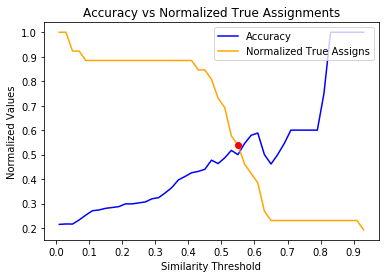

In [6]:
# Uses KMeans for cluster assignment, computes the similarity of the assignment with nodes
# that also belong to the cluster assignment 
averageSimArray = expUtil.runCombinationExp()

In [7]:
#Creates Final CSV to create metaGraph

#Minimum threshold to merge 2 nodes from extracted subject verb objects
ClusterThreshold = .85

#Minimum threshold to assign variable to a cluster
VariableThreshold = .5

mergeUtil.createFinalGraph(ClusterThreshold, VariableThreshold, averageSimArray)

2019-03-25 13:55:20,344 mergedSVO.csv Created


In [ ]:
'''
The idea behind this experiment is to create a set of clusters using the Training data extracted
from the cleaned versions of the intro.md files and then assign the variables extracted
from the code associated with the intro.md files to one of these clusters. In order to achieve this, 
we first transformed the subjects, objects, and verbs into embeddings and used DBSCAN clustering to 
determine which sets of SOVs are "unclusterable" and to determine how many clusters to use for KMeans. 
Subsequently, we used KMeans on SOVs that were determined to be "clusterable" by DBSCAN to group 
the variables extracted from code. Finally, evaluation of the model is determined by comparing the cluster 
labels the variables were assigned by KMeans to the hand labeled dataset.

The accuracy arrived by utilizing KMeans is around 22% which is significantly better than random given that there
are over 30 possible cluster assignments. However, this method of variable classification is limited by the quality
of the clusters produced by the Training data. For example, KMeans will be forced to assign a variable to a cluster
simply because it is better than the other clusters available; however, the variable may be completely irrelevant
compared to the other values in its assigned cluster. To solve this problem, we utilize a threshold prior to 
the assignment based on how "similar" the variable is compared to the other phrases that also belong to that 
cluster using the similarity comparator from spaCy. As seen from the graph generated above, Accuracy of the 
retrieved assignments increases as the threshold is raised while the number of assignments decreases.

There are many improvements that can be made to potentially increase accuracy. By increasing the amount of training
data will have a high probability of improving our results since the current intro.md files are terse in their 
model description. Increasing the dataset would also provide an increase to the number of clusters and greatly improve 
the quality of assignment. This in-turn will have an impact on the threshold which would require 
further experimentation. Subsequently, sometimes the variables that are extracted from code are too simple such that
they are of only 1 character length which makes it hard to determine semantic meaning. Furthermore, 
other methods of determining "similarity" will also be explored. The current implementation using
the spaCy similarity() is constrained in that it is most useful in checking for duplications but is not as good
in terms of comparing semantic meaning.
'''